In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import h5py
import csv
import math
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.animation as animation
from matplotlib.animation import ArtistAnimation

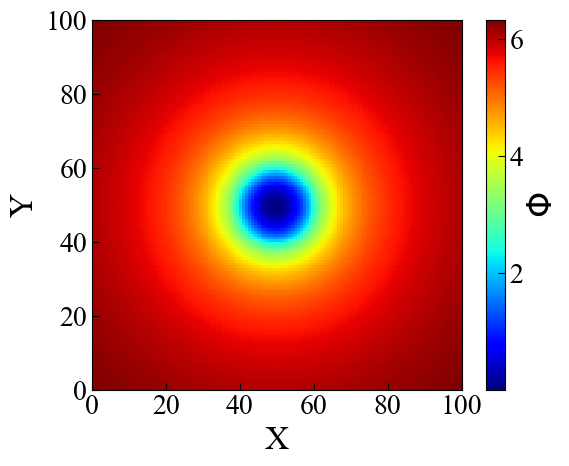

In [33]:
i = 1
dir1  = '/Users/maedarn/Dropbox/analysis/gravity_solver/telegraph/telegraph-test-3D-shusoku/telegraph-128-2000st-T20-cg1-L100-3pwe-4thcd/'
folder1="Phiwv"  #+ str(np.int(sample_frequency)) 
folder2="Phiexa"  #+ str(np.int(sample_frequency)) 

#h5file1 = h5py.File(dir1+'NAllHDF'+"%03.f"%(i)+'.h5',"r")
with h5py.File(dir1+'NAllHDF'+"%03.f"%(i)+'.h5',"r")as f:

#データ読み込み
    Phiwv1to1  = f["Phiwv/Phiwv1"]
    Phiexa1 = f[folder2+"/Phiexa"]

    pmin=ndarray.min(Phiexa1)
    pmax=ndarray.max(Phiexa1)
    
    data01=Phiwv1to1[:,:,64]
    data02=Phiexa1[:,:,64]
    
    data01_1D=Phiwv1to1[:64,64]/(pmax-pmin)
    data02_1D=Phiexa[:,64,64]/(pmax-pmin)
    
    

fig = plt.figure()
ax = fig.add_subplot(111)
#fig.subplots_adjust(bottom=0, left=0, top=1, right=1)

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
#plt.rcParams["xtick.minor.visible"] = True          #x軸補助目盛りの追加
#plt.rcParams["ytick.minor.visible"] = True          #y軸補助目盛りの追加
#plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
#plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
#plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
#plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 5                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 5                #y軸主目盛り線の長さ
#plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
#plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 20                       #フォントの大きさ
#plt.rcParams["axes.linewidth"] = 1.5                 #囲みの太さ


x = np.arange(0.0, 1.01, 1.0/128.0)
y = np.arange(0.0, 1.01, 1.0/128.0)
plt.pcolormesh(x,y,data02, cmap='jet') # 等高線図の生成。cmapで色付けの規則を指定する。


#plt.clim(-0.0, 6.0)
pp=plt.colorbar (orientation="vertical") # カラーバーの表示 "vertical"
pp.set_label("$\Phi$", fontsize=24) #カラーバーのラベル
plt.xlim([-0.0, 100.0]) # x方向の描画範囲を指定
plt.ylim([-0.0, 100.0]) # y方向の描画範囲を指定
plt.xlabel('X', fontsize=24)
plt.ylabel('Y', fontsize=24)
plt.xticks(np.arange(0, 101, step=20))
plt.yticks(np.arange(0, 101, step=20))
#fig = plt.figure(figsize=(5, 5))
#ax.set_aspect('equal', adjustable='box')
#quadmesh.set_clim(vmin=0, vmax=15)
#plt.axes().set_aspect('equal', 'datalim')
plt.gca().set_aspect('equal')

#pp = PdfPages('/Users/maeda/Desktop/phi'+"%03.f"%(i)+'.pdf')
pp = PdfPages('/Users/maedarn/Desktop/phiexa.pdf')
# 画像をPDFとして保存する
pp.savefig(fig, bbox_inches='tight')
# PDFの保存終了
pp.close()


plt.show()

In [3]:
i = 1
nmesh=64.0
#dir1  = '/Users/maedarn/Dropbox/analysis/cluster formation by HI cloud collision/multipole/test-dist/d0100/'
dir1  = '/Users/maedarn/Dropbox/analysis/gravity_solver/telegraph/test-tel/wv-propagation/pfm064x/'

folder1="Phiwv"  #+ str(np.int(sample_frequency)) 
folder2="Phiexa"  #+ str(np.int(sample_frequency)) 

#h5file1 = h5py.File(dir1+'NNNAllHDF'+"%03.f"%(i)+'.h5',"r")
with h5py.File(dir1+'QAllHDF'+"%03.f"%(i)+'.h5',"r") as f:


#データ読み込み
#Phiwv1to1  = h5file1[folder1+"/Phiwv1"].value 
#Phiexa1 = h5file1[folder2+"/Rho"].value 

    Phiwv1to1= f[folder1+"/Phiwv1"]
    Phiexa1 = f[folder2+"/Phiexa"]

    data01_3D= Phiwv1to1[()]
    data02_3D=Phiexa1[()]

    data01=Phiwv1to1[:,:,1]
    data02=Phiexa1[:,:,1]
    
    
with h5py.File(dir1+'QAllHDF'+"%03.f"%(i+10)+'.h5',"r") as f1:
    
    Phiwv1to1n= f1[folder1+"/Phiwv1"]
    Phiexa1n = f1[folder2+"/Phiexa"]

    data01_3Dn= Phiwv1to1n[()]
    data02_3Dn=Phiexa1n[()]

    data01n=Phiwv1to1n[:,:,1]
    data02n=Phiexa1n[:,:,1]

m1=np.max(data01)
m2=np.max(data02)

data=data01-data02
data=data-m1+m2

datan=data01-data01n

fig = plt.figure()
ax = fig.add_subplot(111)
#fig.subplots_adjust(bottom=0, left=0, top=1, right=1)

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
#plt.rcParams["xtick.minor.visible"] = True          #x軸補助目盛りの追加
#plt.rcParams["ytick.minor.visible"] = True          #y軸補助目盛りの追加
#plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
#plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
#plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
#plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 5                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 5                #y軸主目盛り線の長さ
#plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
#plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 20                       #フォントの大きさ
#plt.rcParams["axes.linewidth"] = 1.5                 #囲みの太さ


x = np.arange(0.0, 100.1, 100.0/nmesh)
y = np.arange(0.0, 100.1, 100.0/nmesh)
plt.pcolormesh(x,y,datan, cmap='jet') # 等高線図の生成。cmapで色付けの規則を指定する。


plt.clim(-0.0000050, 0.0000050)
pp=plt.colorbar (orientation="vertical") # カラーバーの表示 "vertical"
pp.set_label("$\Phi$", fontsize=24) #カラーバーのラベル
plt.xlim([-0.0, 100.0]) # x方向の描画範囲を指定
plt.ylim([-0.0, 100.0]) # y方向の描画範囲を指定
plt.xlabel('X', fontsize=24)
plt.ylabel('Y', fontsize=24)
plt.xticks(np.arange(0, 101, step=20))
plt.yticks(np.arange(0, 101, step=20))
#fig = plt.figure(figsize=(5, 5))
#ax.set_aspect('equal', adjustable='box')
#quadmesh.set_clim(vmin=0, vmax=15)
#plt.axes().set_aspect('equal', 'datalim')
plt.gca().set_aspect('equal')

#pp = PdfPages('/Users/maeda/Desktop/phi'+"%03.f"%(i)+'.pdf')
pp = PdfPages('/Users/maedarn/Desktop/phierr.pdf')
# 画像をPDFとして保存する
pp.savefig(fig, bbox_inches='tight')
# PDFの保存終了
pp.close()


plt.show()

KeyError: 'Unable to open object (component not found)'

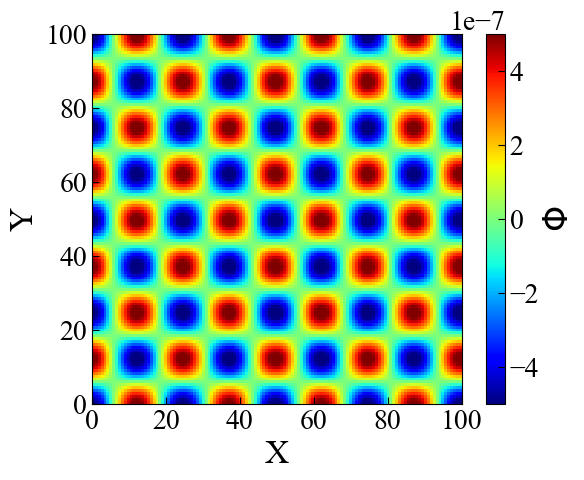

In [59]:
i = 5
nmesh=128.0
#dir1  = '/Users/maedarn/Dropbox/analysis/cluster formation by HI cloud collision/multipole/test-dist/d0100/'
dir1  = '/Users/maedarn/Dropbox/analysis/gravity_solver/telegraph/test-tel/wv-propagation/pfmdmesh0128sc-wv/'

folder1="Phiwv"  #+ str(np.int(sample_frequency)) 
folder2="Phiexa"#"Phigrdwv"  #+ str(np.int(sample_frequency)) 


#h5file1 = h5py.File(dir1+'NNNAllHDF'+"%03.f"%(i)+'.h5',"r")
with h5py.File(dir1+'QAllHDF'+"%03.f"%(i)+'.h5',"r") as f:


#データ読み込み
#Phiwv1to1  = h5file1[folder1+"/Phiwv1"].value 
#Phiexa1 = h5file1[folder2+"/Rho"].value 

    Phiwv1to1= f[folder1+"/Phiwv1"]
    Phiexa1 = f[folder2+"/Phiexa"]#"/Phigrdwv1"]

    data01_3D= Phiwv1to1[()]
    data02_3D=Phiexa1[()]

    data01=Phiwv1to1[:,:,1]
    data02=Phiexa1[:,:,1]/16.0
    
    data01_1D=Phiwv1to1[:,1,1]
    data02_1D=Phiexa1[:,1,1]
    
    
with h5py.File(dir1+'QAllHDF'+"%03.f"%(i+1)+'.h5',"r") as f1:
    
    Phiwv1to1n= f1[folder1+"/Phiwv1"]
    Phiexa1n = f1[folder2+"/Phiexa"]#"/Phigrdwv1"]"/Phigrdwv1"]

    data01_3Dn= Phiwv1to1n[()]
    data02_3Dn=Phiexa1n[()]

    data01n=Phiwv1to1n[:,:,1]
    data02n=Phiexa1n[:,:,1]

m1=np.max(data01)
m2=np.max(data02)

data=data01-data02
data=data-m1+m2

datan=data01-data01n

fig = plt.figure()
ax = fig.add_subplot(111)
#fig.subplots_adjust(bottom=0, left=0, top=1, right=1)

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
#plt.rcParams["xtick.minor.visible"] = True          #x軸補助目盛りの追加
#plt.rcParams["ytick.minor.visible"] = True          #y軸補助目盛りの追加
#plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
#plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
#plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
#plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 5                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 5                #y軸主目盛り線の長さ
#plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
#plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 20                       #フォントの大きさ
#plt.rcParams["axes.linewidth"] = 1.5                 #囲みの太さ


x = np.arange(0.0, 100.1, 100.0/nmesh)
y = np.arange(0.0, 100.1, 100.0/nmesh)
plt.pcolormesh(x,y,data01, cmap='jet') # 等高線図の生成。cmapで色付けの規則を指定する。

plt.clim(-0.0000005, 0.0000005)
pp=plt.colorbar (orientation="vertical") # カラーバーの表示 "vertical"
pp.set_label("$\Phi$", fontsize=24) #カラーバーのラベル
plt.xlim([-0.0, 100.0]) # x方向の描画範囲を指定
plt.ylim([-0.0, 100.0]) # y方向の描画範囲を指定
plt.xlabel('X', fontsize=24)
plt.ylabel('Y', fontsize=24)
plt.xticks(np.arange(0, 101, step=20))
plt.yticks(np.arange(0, 101, step=20))
#fig = plt.figure(figsize=(5, 5))
#ax.set_aspect('equal', adjustable='box')
#quadmesh.set_clim(vmin=0, vmax=15)
#plt.axes().set_aspect('equal', 'datalim')
plt.gca().set_aspect('equal')



#pp = PdfPages('/Users/maeda/Desktop/phi'+"%03.f"%(i)+'.pdf')
pp = PdfPages('/Users/maedarn/Desktop/phierr.pdf')
# 画像をPDFとして保存する
pp.savefig(fig, bbox_inches='tight')
# PDFの保存終了
pp.close()


plt.show()

[ 0.       0.78125  1.5625   2.34375  3.125    3.90625  4.6875   5.46875
  6.25     7.03125  7.8125   8.59375  9.375   10.15625 10.9375  11.71875
 12.5     13.28125 14.0625  14.84375 15.625   16.40625 17.1875  17.96875
 18.75    19.53125 20.3125  21.09375 21.875   22.65625 23.4375  24.21875
 25.      25.78125 26.5625  27.34375 28.125   28.90625 29.6875  30.46875
 31.25    32.03125 32.8125  33.59375 34.375   35.15625 35.9375  36.71875
 37.5     38.28125 39.0625  39.84375 40.625   41.40625 42.1875  42.96875
 43.75    44.53125 45.3125  46.09375 46.875   47.65625 48.4375  49.21875
 50.      50.78125 51.5625  52.34375 53.125   53.90625 54.6875  55.46875
 56.25    57.03125 57.8125  58.59375 59.375   60.15625 60.9375  61.71875
 62.5     63.28125 64.0625  64.84375 65.625   66.40625 67.1875  67.96875
 68.75    69.53125 70.3125  71.09375 71.875   72.65625 73.4375  74.21875
 75.      75.78125 76.5625  77.34375 78.125   78.90625 79.6875  80.46875
 81.25    82.03125 82.8125  83.59375 84.375   85.15

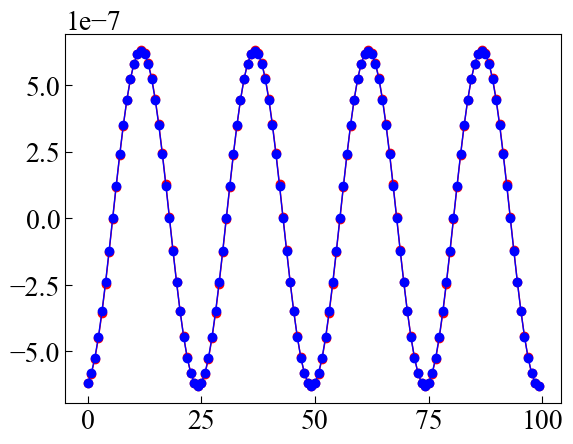

In [67]:
i = 20
nmesh=128.0
n_nxt=1
#dir1  = '/Users/maedarn/Dropbox/analysis/cluster formation by HI cloud collision/multipole/test-dist/d0100/'
#dir1  = '/Users/maedarn/Dropbox/analysis/gravity_solver/telegraph/test-tel/wv-propagation/pfm064x/'
dir1  = '/Users/maedarn/Dropbox/analysis/gravity_solver/telegraph/test-tel/wv-propagation/pfmdmesh0128sc-wv/'

folder1="Phiwv"  #+ str(np.int(sample_frequency)) 
folder2="Phiexa"#"Phigrdwv"  #+ str(np.int(sample_frequency)) 

#h5file1 = h5py.File(dir1+'NNNAllHDF'+"%03.f"%(i)+'.h5',"r")
with h5py.File(dir1+'QAllHDF'+"%03.f"%(i)+'.h5',"r") as f:


#データ読み込み
#Phiwv1to1  = h5file1[folder1+"/Phiwv1"].value 
#Phiexa1 = h5file1[folder2+"/Rho"].value 

    Phiwv1to1= f[folder1+"/Phiwv1"]
    Phiexa1 = f[folder2+"/Phiexa"]

    data01_3D= Phiwv1to1[()]
    data02_3D=Phiexa1[()]

    data01=Phiwv1to1[:,:,1]
    data02=Phiexa1[:,:,1]
    
    data01_1D=Phiwv1to1[:,1,1]
    data02_1D=Phiexa1[:,1,1]/16.0
    
    
with h5py.File(dir1+'QAllHDF'+"%03.f"%(i+n_nxt)+'.h5',"r") as f1:
    
    Phiwv1to1n= f1[folder1+"/Phiwv1"]
    Phiexa1n = f1[folder2+"/Phiexa"]

    data01_3Dn= Phiwv1to1n[()]
    data02_3Dn=Phiexa1n[()]

    data01n=Phiwv1to1n[:,:,1]
    data02n=Phiexa1n[:,:,1]
    
    data01n_1D=Phiwv1to1n[:,1,1]
    data02n_1D=Phiexa1n[:,1,1]/16.0

m1=np.max(data01)
m2=np.max(data02)

data=data01-data02
data=data-m1+m2

datan=data01-data01n

fig = plt.figure()
ax = fig.add_subplot(111)
#fig.subplots_adjust(bottom=0, left=0, top=1, right=1)

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["xtick.major.size"] = 5                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 5                #y軸主目盛り線の長さ
plt.rcParams["font.size"] = 20                       #フォントの大きさ


x = np.arange(0.0, 100, 100.0/nmesh)
print(x)
length = len(x)
print(length)

plt.plot(x,data01_1D,marker="o",color='red', linewidth = 1) 
plt.plot(x,data02n_1D,marker="o",color='blue', linewidth = 1) 



#pp = PdfPages('/Users/maeda/Desktop/phi'+"%03.f"%(i)+'.pdf')
pp = PdfPages('/Users/maedarn/Desktop/phierr.pdf')
# 画像をPDFとして保存する
pp.savefig(fig, bbox_inches='tight')
# PDFの保存終了
pp.close()


plt.show()

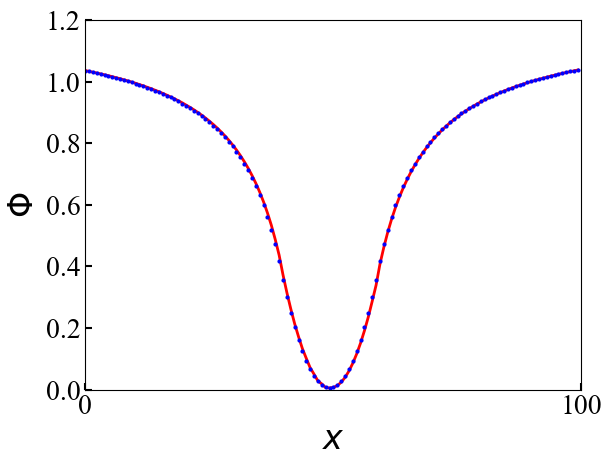

In [28]:
i = 100
dir1  = '/Users/maedarn/Dropbox/analysis/gravity_solver/telegraph/telegraph-test-3D-shusoku/telegraph-128-2000st-T20-cg1-L100-3pwe-4thcd/'
folder1="Phiwv"  #+ str(np.int(sample_frequency)) 
folder2="Phiexa"  #+ str(np.int(sample_frequency)) 

#h5file1 = h5py.File(dir1+'NAllHDF'+"%03.f"%(i)+'.h5',"r")
with h5py.File(dir1+'NAllHDF'+"%03.f"%(i)+'.h5',"r")as f:

#データ読み込み
    Phiwv1to1  = f["Phiwv/Phiwv1"]
    Phiexa1 = f[folder2+"/Phiexa"]

    pmin=np.min(Phiexa1)
    pmax=np.max(Phiexa1)
    
    data01=Phiwv1to1[:,:,64]
    data02=Phiexa1[:,:,64]
    
    data01_1D=Phiwv1to1[:,64,64]#/(pmax-pmin)
    data02_1D=Phiexa1[:,64,64]#/(pmax-pmin)
    pmin=np.min(data02_1D)
    pmax=np.max(data02_1D)
    data01_1D=data01_1D/(pmax-pmin)/0.968
    data02_1D=data02_1D/(pmax-pmin)/0.968
    
    
    

fig = plt.figure()
ax = fig.add_subplot(111)
#fig.subplots_adjust(bottom=0, left=0, top=1, right=1)

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["xtick.minor.visible"] = False          #x軸補助目盛りの追加
plt.rcParams["ytick.minor.visible"] = False          #y軸補助目盛りの追加
#plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
#plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
#plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
#plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
#plt.rcParams["xtick.major.size"] = 5                #x軸主目盛り線の長さ
#plt.rcParams["ytick.major.size"] = 5                #y軸主目盛り線の長さ
#plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
#plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 20                       #フォントの大きさ
#plt.rcParams["axes.linewidth"] = 1.5                 #囲みの太さ

x = np.arange(0.0, 100.1, 100.1/128.0)
plt.plot(x,data01_1D,color='red', linewidth = 2) 
plt.plot(x,data02_1D,marker=".",color='blue', linestyle='None',markersize=4) 


#plt.clim(-0.0, 6.0)
#pp=plt.colorbar (orientation="vertical") # カラーバーの表示 "vertical"
#pp.set_label("$\Phi$", fontsize=24) #カラーバーのラベル
plt.xlim([-0.0, 99.]) # x方向の描画範囲を指定
plt.ylim([-0.0, 1.2]) # y方向の描画範囲を指定
plt.xlabel('X', fontsize=24)
plt.ylabel('Y', fontsize=24)
plt.xticks(np.arange(0, 1.01, step=20))
plt.yticks(np.arange(0, 1.01, step=20))
#fig = plt.figure(figsize=(5, 5))
#ax.set_aspect('equal', adjustable='box')
#quadmesh.set_clim(vmin=0, vmax=15)
#plt.axes().set_aspect('equal', 'datalim')
#plt.gca().set_aspect('equal')

ax.set_xlabel('$x$')
ax.set_ylabel('$\Phi$')

plt.xticks(np.arange(0, 100 + 1, 100))
plt.yticks(np.arange(0, 1.2 + 1, 0.2))
plt.rcParams["ytick.minor.visible"] = False          #y軸補助目盛りの追加
plt.ylim([-0.0, 1.2]) # y方向の描画範囲を指定

#pp = PdfPages('/Users/maeda/Desktop/phi'+"%03.f"%(i)+'.pdf')
pp = PdfPages('/Users/maedarn/Desktop/phiexa.pdf')
# 画像をPDFとして保存する
pp.savefig(fig, bbox_inches='tight')
# PDFの保存終了
pp.close()


plt.show()